In [15]:
## import necessary libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


In [16]:
## Read a csv file using pandas library 
df=pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv")
print(df)

      Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Age  Strength  
0               1040.0           676.0   28     79.99  
1               1055.0           676.0   28    

In [17]:
## Checking shape of data
df.shape

(1030, 9)

In [18]:
#Checking th whole data using describe function
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [19]:
# Observing that missing values are available or not
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [20]:
##Split data into X and y
df_col=df.columns
X=df[df_col[df_col!="Strength"]]
y=df["Strength"]

In [21]:
X.tail()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28


In [22]:
y.tail()

1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, dtype: float64

In [209]:
X.tail()
mean_X = np.mean(X, axis=0)  # Calculate mean for each feature in X
std_X = np.std(X, axis=0)    # Calculate standard deviation for each feature in X

mean_y = np.mean(y)          # Calculate mean for y
std_y = np.std(y)            # Calculate standard deviation for y

# Apply Z-Score Standardization to X and y
X = (X - mean_X) / std_X
y = (y - mean_y) / std_y

In [210]:
## Split data into test and t rain set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=None)

In [211]:
X_test.shape

(309, 8)

In [212]:
y_train.shape

(721,)

In [213]:
n_col=X_norm.shape[1]

In [214]:
n_col


8

In [215]:
##Model creation function
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_col,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='adam',loss='mean_squared_error',metrics = ['mse', 'mae'])
    return model
              

In [216]:
# build the model
model = regression_model()

In [217]:
history=model.fit(X_train,y_train,epochs=50,verbose=2,validation_split=0.3)

Epoch 1/50
16/16 - 2s - loss: 1.0375 - mse: 1.0375 - mae: 0.8104 - val_loss: 0.8819 - val_mse: 0.8819 - val_mae: 0.7540 - 2s/epoch - 116ms/step
Epoch 2/50
16/16 - 0s - loss: 0.7137 - mse: 0.7137 - mae: 0.6807 - val_loss: 0.6482 - val_mse: 0.6482 - val_mae: 0.6374 - 103ms/epoch - 6ms/step
Epoch 3/50
16/16 - 0s - loss: 0.5512 - mse: 0.5512 - mae: 0.5971 - val_loss: 0.4891 - val_mse: 0.4891 - val_mae: 0.5522 - 102ms/epoch - 6ms/step
Epoch 4/50
16/16 - 0s - loss: 0.4387 - mse: 0.4387 - mae: 0.5289 - val_loss: 0.4127 - val_mse: 0.4127 - val_mae: 0.5058 - 102ms/epoch - 6ms/step
Epoch 5/50
16/16 - 0s - loss: 0.3821 - mse: 0.3821 - mae: 0.4894 - val_loss: 0.3750 - val_mse: 0.3750 - val_mae: 0.4802 - 101ms/epoch - 6ms/step
Epoch 6/50
16/16 - 0s - loss: 0.3374 - mse: 0.3374 - mae: 0.4596 - val_loss: 0.3432 - val_mse: 0.3432 - val_mae: 0.4580 - 93ms/epoch - 6ms/step
Epoch 7/50
16/16 - 0s - loss: 0.3064 - mse: 0.3064 - mae: 0.4369 - val_loss: 0.3296 - val_mse: 0.3296 - val_mae: 0.4447 - 104ms/epoc

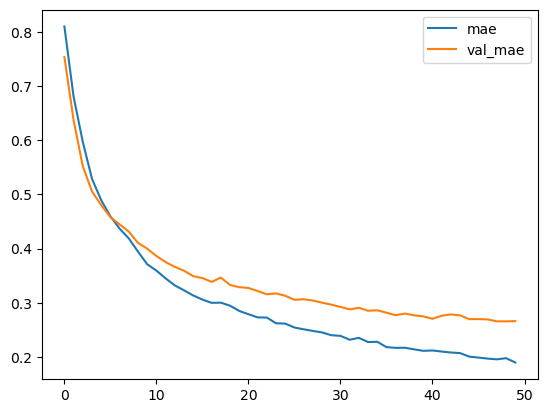

In [218]:
#Plot mae and val_mae in the graph
import matplotlib.pyplot as plt
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')

plt.legend()

In [219]:
X_test = np.array(X_test)
y_test = np.array(y_test)
scores = model.evaluate(X_test, y_test, verbose = 0)

print('Mean Squared Error : ', scores[2])
print('Mean Absolute Error : ', scores[1])


Mean Squared Error :  0.27563953399658203
Mean Absolute Error :  0.12971867620944977


In [220]:
y_pred=model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [221]:
##As you can model r2 score increase from about 78 to almost 88 when we us normalization factor
from sklearn.metrics import r2_score

print('r2 score: ', r2_score(y_test, y_pred))

r2 score:  0.8792268426750671


10/10 [==============================] - 0s 2ms/step


[]

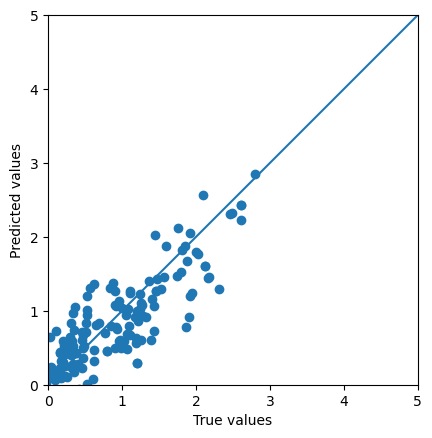

In [225]:
y_pred = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.plot([0, 5], [0, 5])
plt.plot()


In [226]:
y_test=list(y_test)
y_pred=list(y_pred)



In [227]:
def calculate_mse(y_test, y_pred):
    # Create an empty list to store MSE values
    MSE = []

    # Iterate through the range of data points (first 50 in this case)
    for i in range(len(y_test[:50])):
        x = np.power((y_test[i] - y_pred[i]), 2)
        MSE.append(x)

    # Return the list of MSE values
    return MSE

In [228]:
mse_values = calculate_mse(y_test, y_pred)


In [231]:
Mean_mse=(1/len(mse_values))*np.sum(mse_values)
print(Mean_msc)


56.90396856752447


In [232]:
StdDev_MSE = np.std(mse_values)
print(StdDev_MSE)

0.2429900830467341
